In [11]:
file_path = '/content/simulated_data.csv'

<ipython-input-1-42b80328c527>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.values, y=city_counts.index, palette="viridis")


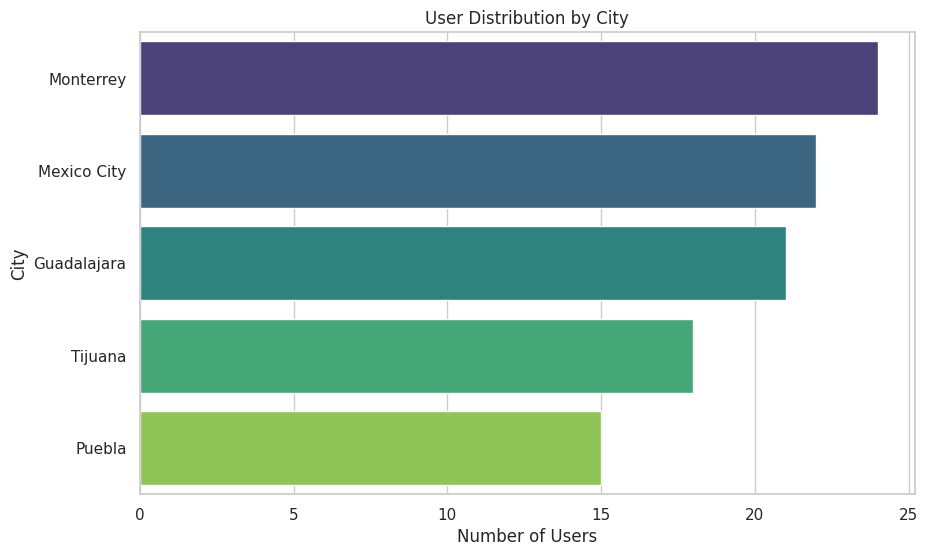

<ipython-input-1-42b80328c527>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=os_counts.values, y=os_counts.index, palette="magma")


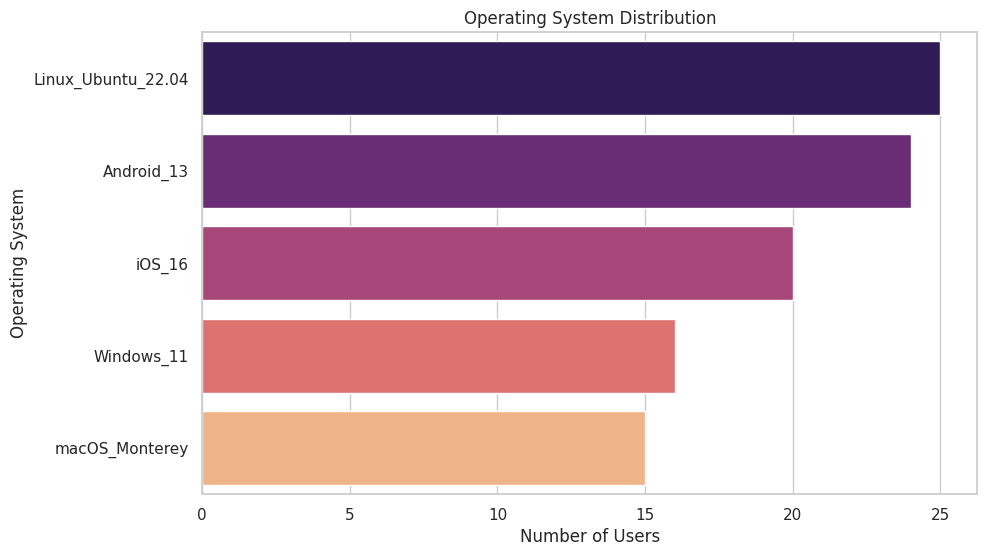

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the CSV file
data = pd.read_csv(file_path)

# Visualization settings
sns.set(style="whitegrid")

# Analysis of User Distribution by City
city_counts = data['CITY'].value_counts()

# Plot for User Distribution by City
plt.figure(figsize=(10, 6))
sns.barplot(x=city_counts.values, y=city_counts.index, palette="viridis")
plt.title('User Distribution by City')
plt.xlabel('Number of Users')
plt.ylabel('City')
plt.show()

# Analysis of Operating System Distribution
os_counts = data['OS_USER'].value_counts()

# Plot for Operating System Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=os_counts.values, y=os_counts.index, palette="magma")
plt.title('Operating System Distribution')
plt.xlabel('Number of Users')
plt.ylabel('Operating System')
plt.show()


<ipython-input-4-422444481bec>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=event_flows.index, x=event_flows.values, palette="viridis")


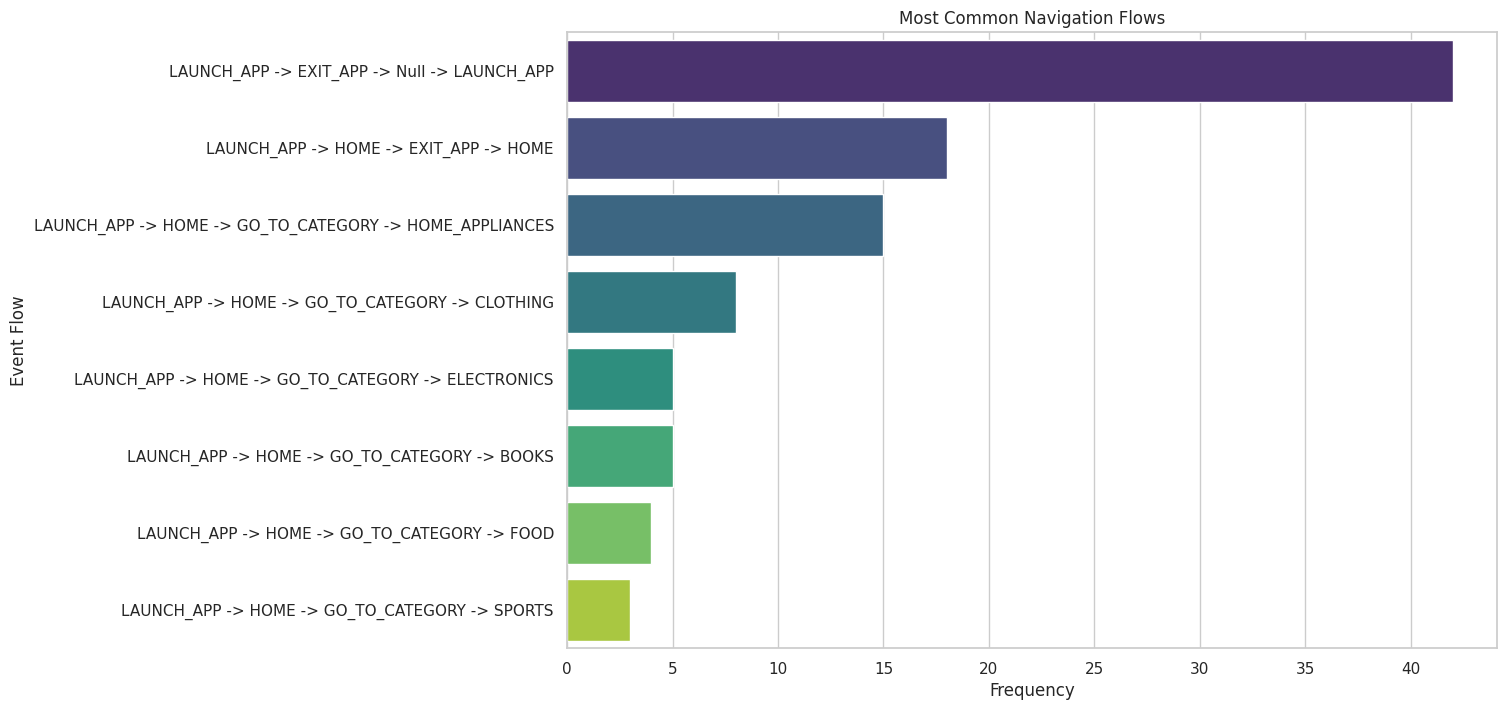

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv(file_path)

# Create a new column with the sequence of events
data['EVENT_FLOW'] = data[['INITIAL_EVENT', 'EVENT_2', 'EVENT_3', 'EVENT_OUT']].agg(' -> '.join, axis=1)

# Count the most common sequences
event_flows = data['EVENT_FLOW'].value_counts().head(10)

# Visualization settings
sns.set(style="whitegrid")

# Plot for Most Common Navigation Flows
plt.figure(figsize=(12, 8))
sns.barplot(y=event_flows.index, x=event_flows.values, palette="viridis")
plt.title('Most Common Navigation Flows')
plt.xlabel('Frequency')
plt.ylabel('Event Flow')
plt.show()


Conversion Rate: 26.00%


<ipython-input-5-835e3c91a803>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_method_counts.values, y=payment_method_counts.index, palette="magma")


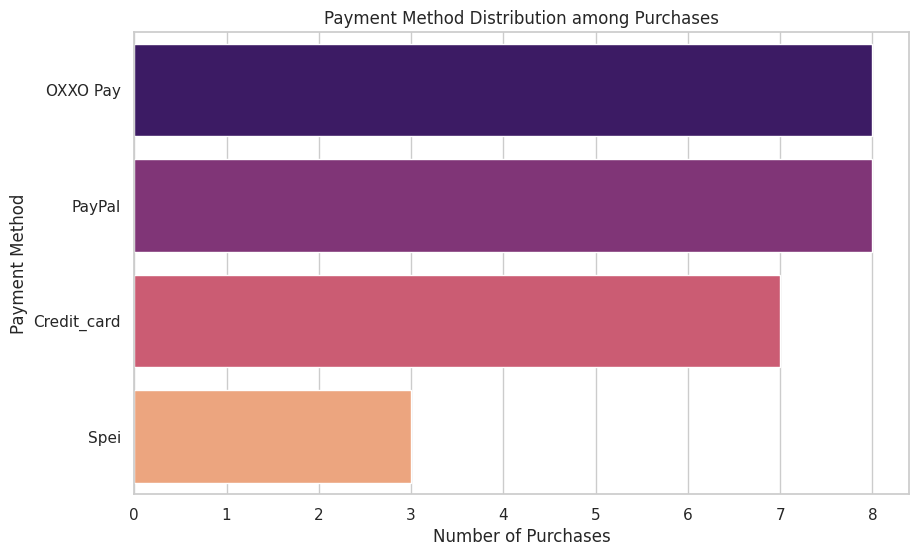

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv(file_path)

# Conversion Rate
total_sessions = len(data)
total_purchases = len(data[data['ORDER_TYPE'] == 'PURCHASE'])
conversion_rate = (total_purchases / total_sessions) * 100

print(f"Conversion Rate: {conversion_rate:.2f}%")

# Distribution of Payment Methods
# Filter only the rows where a purchase was made
purchase_data = data[data['ORDER_TYPE'] == 'PURCHASE']
payment_method_counts = purchase_data['PAYMENT_METHOD'].value_counts()

# Visualization settings
sns.set(style="whitegrid")

# Plot for Payment Method Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_method_counts.values, y=payment_method_counts.index, palette="magma")
plt.title('Payment Method Distribution among Purchases')
plt.xlabel('Number of Purchases')
plt.ylabel('Payment Method')
plt.show()


In [8]:
import folium
from folium.plugins import HeatMap
import pandas as pd

# Cargar datos
data = pd.read_csv(file_path)

# Filtrar solo las compras
purchase_data = data[data['ORDER_TYPE'] == 'PURCHASE']

# Crear un mapa centrado en México
mexico_map = folium.Map(location=[23.6345, -102.5528], zoom_start=5)

# Añadir un diagrama de calor al mapa
HeatMap(purchase_data[['LATITUDE', 'LONGITUDE']]).add_to(mexico_map)

# Guardar el mapa en un archivo HTML o mostrarlo en un Jupyter Notebook
mexico_map.save('mexico_heatmap.html')
# o en Jupyter Notebook: mexico_map


In [ ]:
from IPython.display import IFrame

# Asegúrate de proporcionar la ruta correcta al archivo HTML
IFrame('/content/mexico_heatmap.html', width=700, height=500)

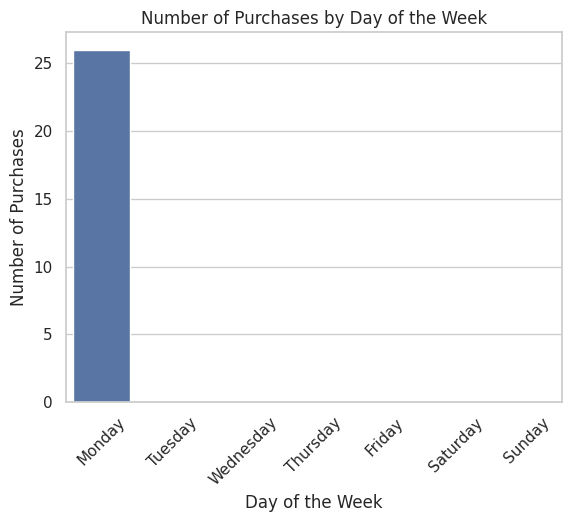

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cargar datos
data = pd.read_csv(file_path)

# Convertir 'CREATED_AT' a datetime y extraer el día de la semana
data['CREATED_AT'] = pd.to_datetime(data['CREATED_AT'])
data['DAY_OF_WEEK'] = data['CREATED_AT'].dt.day_name()

# Agrupar por día de la semana
daily_purchases = data[data['ORDER_TYPE'] == 'PURCHASE'].groupby('DAY_OF_WEEK').size()

# Ordenar por día de la semana
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_purchases = daily_purchases.reindex(order)

# Gráfico de las compras por día de la semana
sns.barplot(x=daily_purchases.index, y=daily_purchases.values)
plt.xticks(rotation=45)
plt.title('Number of Purchases by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Purchases')
plt.show()
